<a href="https://colab.research.google.com/github/SujitVarma299/2311cs020685/blob/main/AD%20Daily%20Assignments/Python_Day_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Day_15_Healthcare_Data.csv to Day_15_Healthcare_Data.csv


In [ ]:
df = pd.read_csv('Day_15_Healthcare_Data.csv')
print(df.head())
print(df.describe())
print(df.info())


   Patient_ID  Age  Gender  Blood_Pressure  Cholesterol Diabetes Heart_Disease
0           1   69    Male            95.0        122.0       No            No
1           2   32    Male           129.0        191.0       No            No
2           3   89  Female           101.0        214.0       No            No
3           4   78  Female           142.0        203.0       No            No
4           5   38    Male           160.0        217.0       No            No
       Patient_ID         Age  Blood_Pressure  Cholesterol
count  505.000000  505.000000      475.000000   485.000000
mean   249.693069   52.918812      133.412632   200.470103
std    144.240508   21.064700       25.933424    58.533857
min      1.000000   18.000000       90.000000   101.000000
25%    126.000000   34.000000      111.000000   149.000000
50%    249.000000   52.000000      132.000000   207.000000
75%    374.000000   71.000000      155.000000   249.000000
max    500.000000   89.000000      179.000000   299.00

In [ ]:
missing_values = df.isna()
print(missing_values.sum())
missing_percentage = df.isna().mean() * 100
print(missing_percentage)

Patient_ID         0
Age                0
Gender            21
Blood_Pressure    30
Cholesterol       20
Diabetes           0
Heart_Disease      0
dtype: int64
Patient_ID        0.000000
Age               0.000000
Gender            4.158416
Blood_Pressure    5.940594
Cholesterol       3.960396
Diabetes          0.000000
Heart_Disease     0.000000
dtype: float64


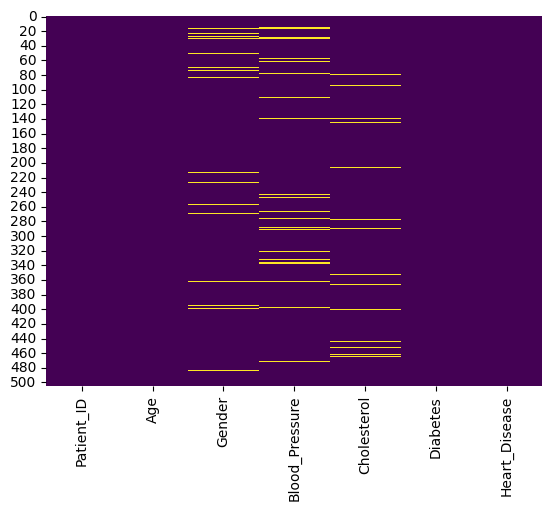

In [ ]:
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.show()

In [ ]:
if 'numerical_column' in df.columns and pd.api.types.is_numeric_dtype(df['numerical_column']):
    df['numerical_column'].fillna(df['numerical_column'].mean(), inplace=True)
    df['numerical_column'].fillna(df['numerical_column'].median(), inplace=True)
else:
    print("numerical_column not found or not numeric")
if 'categorical_column' in df.columns:
    df['categorical_column'].fillna(df['categorical_column'].mode()[0], inplace=True)
else:
    print("categorical_column not found")
from sklearn.impute import KNNImputer
df_numeric = df.select_dtypes(include=[float, int])
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = knn_imputer.fit_transform(df_numeric)
df_knn_imputed = pd.DataFrame(df_knn_imputed, columns=df_numeric.columns)

numerical_column not found or not numeric
categorical_column not found


       Patient_ID         Age  Blood_Pressure  Cholesterol
count  505.000000  505.000000      475.000000   485.000000
mean   249.693069   52.918812      133.412632   200.470103
std    144.240508   21.064700       25.933424    58.533857
min      1.000000   18.000000       90.000000   101.000000
25%    126.000000   34.000000      111.000000   149.000000
50%    249.000000   52.000000      132.000000   207.000000
75%    374.000000   71.000000      155.000000   249.000000
max    500.000000   89.000000      179.000000   299.000000
       Patient_ID         Age  Blood_Pressure  Cholesterol
count  505.000000  505.000000      505.000000   505.000000
mean   249.693069   52.918812      133.374653   200.173465
std    144.240508   21.064700       25.235925    57.680363
min      1.000000   18.000000       90.000000   101.000000
25%    126.000000   34.000000      113.000000   151.000000
50%    249.000000   52.000000      132.800000   206.600000
75%    374.000000   71.000000      153.000000   248.0000

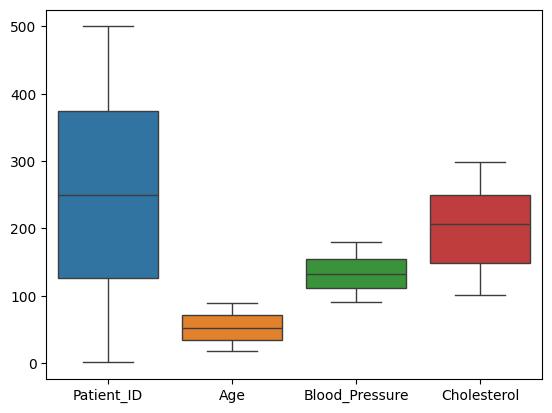

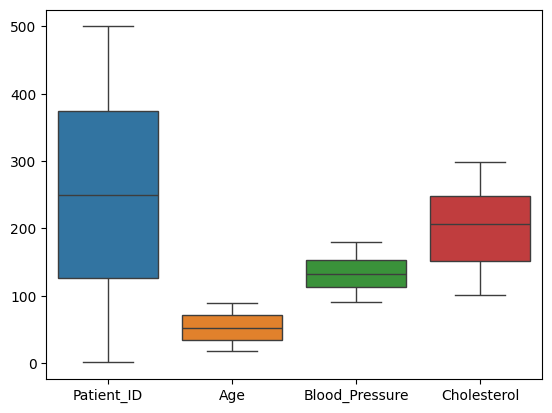

In [ ]:
print(df.describe())
print(df_knn_imputed.describe())
sns.boxplot(data=df)
plt.show()
sns.boxplot(data=df_knn_imputed)
plt.show()